In [1]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from pathlib import Path
import os
import datetime

In [2]:
cur_dir = Path.cwd()
path = str(cur_dir.parent.parent) + '/data/SEED/'
files = os.listdir(path)
print(files)

['10_20131130.mat', '10_20131204.mat', '10_20131211.mat', '11_20140618.mat', '11_20140625.mat', '11_20140630.mat', '12_20131127.mat', '12_20131201.mat', '12_20131207.mat', '13_20140527.mat', '13_20140603.mat', '13_20140610.mat', '14_20140601.mat', '14_20140615.mat', '14_20140627.mat', '15_20130709.mat', '15_20131016.mat', '15_20131105.mat', '1_20131027.mat', '1_20131030.mat', '1_20131107.mat', '2_20140404.mat', '2_20140413.mat', '2_20140419.mat', '3_20140603.mat', '3_20140611.mat', '3_20140629.mat', '4_20140621.mat', '4_20140702.mat', '4_20140705.mat', '5_20140411.mat', '5_20140418.mat', '5_20140506.mat', '6_20130712.mat', '6_20131016.mat', '6_20131113.mat', '7_20131027.mat', '7_20131030.mat', '7_20131106.mat', '8_20140511.mat', '8_20140514.mat', '8_20140521.mat', '9_20140620.mat', '9_20140627.mat', '9_20140704.mat', 'SEED_stimulation.xlsx', 'channel-order.xlsx', 'channel_62_pos.locs', 'label.mat', 'license_SEED.pdf', 'readme.txt', 'subject-id-gender-seed.txt', 'nohup.out']


In [3]:
label_file_mat = scipy.io.loadmat(path + 'label.mat')
labels = label_file_mat['label']
print(labels)

[[ 1  0 -1 -1  0  1 -1  0  1  1  0 -1  0  1 -1]]


In [4]:
i = 2
mat = scipy.io.loadmat(path + files[i])
print(files[i])
print(mat.keys())
print(mat['__header__'])
print(mat['__version__'])
print(mat['__globals__'])
sr = 200.

10_20131211.mat
dict_keys(['__header__', '__version__', '__globals__', 'ww_eeg1', 'ww_eeg2', 'ww_eeg3', 'ww_eeg4', 'ww_eeg5', 'ww_eeg6', 'ww_eeg7', 'ww_eeg8', 'ww_eeg9', 'ww_eeg10', 'ww_eeg11', 'ww_eeg12', 'ww_eeg13', 'ww_eeg14', 'ww_eeg15'])
b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Dec 11 19:26:05 2013'
1.0
[]


In [10]:
data = mat['ww_eeg15']
print(data.shape)
print(data.shape[1]/sr)

(62, 41201)
206.005


In [ ]:
excel_path = str(cur_dir.parent.parent) + '/data/SEED/SEED_stimulation.xlsx'
label_file = pd.read_excel(excel_path)
print(label_file.keys())

Index(['Name of the clip', 'Label', 'Source url', 'Start time point',
       'End time point'],
      dtype='object')


In [ ]:
t_0 = 0
t_1 = 0
t_2 = 0
for i in range(len(label_file)):
    if label_file['Label'][i] in [0., 1., 2.]:
        t = (datetime.datetime.combine(datetime.datetime.today(), label_file['End time point'][i]) - datetime.datetime.combine(datetime.datetime.today(), label_file['Start time point'][i])).total_seconds()
        if label_file['Label'][i] == 0.:
            t_0 += t
        elif label_file['Label'][i] == 1.:
            t_1 += t
        else:
            t_2 += t
print(t_0, t_1, t_2)

1132.0 1107.0 1186.0


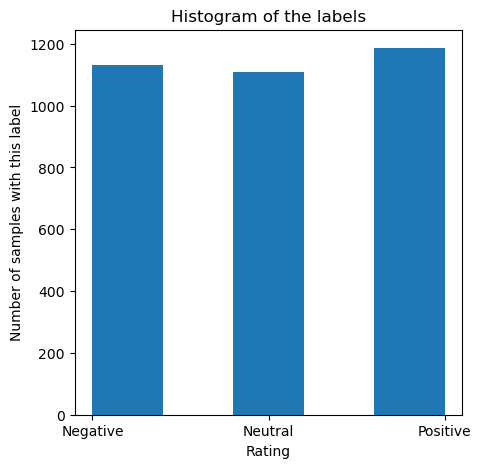

In [ ]:

res = [0]*int(t_0) + [1]*int(t_1) + [2]*int(t_2)

plt.figure(figsize=(5, 5))
plt.hist(res, bins=5)
plt.title('Histogram of the labels')
plt.xlabel('Rating')
plt.xticks(ticks=[0, 1, 2], labels=["Negative", "Neutral", "Positive"])
plt.ylabel('Number of samples with this label')
plt.show()

In [ ]:
sec = int(data.shape[1]/sr)
print(sec)
print(sec//60, "min", sec%60)

233
3 min 53


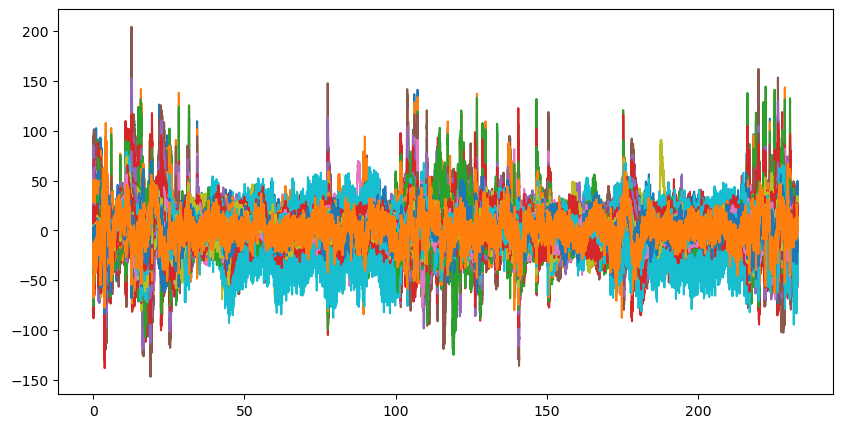

In [ ]:
time = np.arange(data.shape[1])/sr
plt.figure(figsize=(10, 5))
plt.plot(time, data.T)
plt.show()

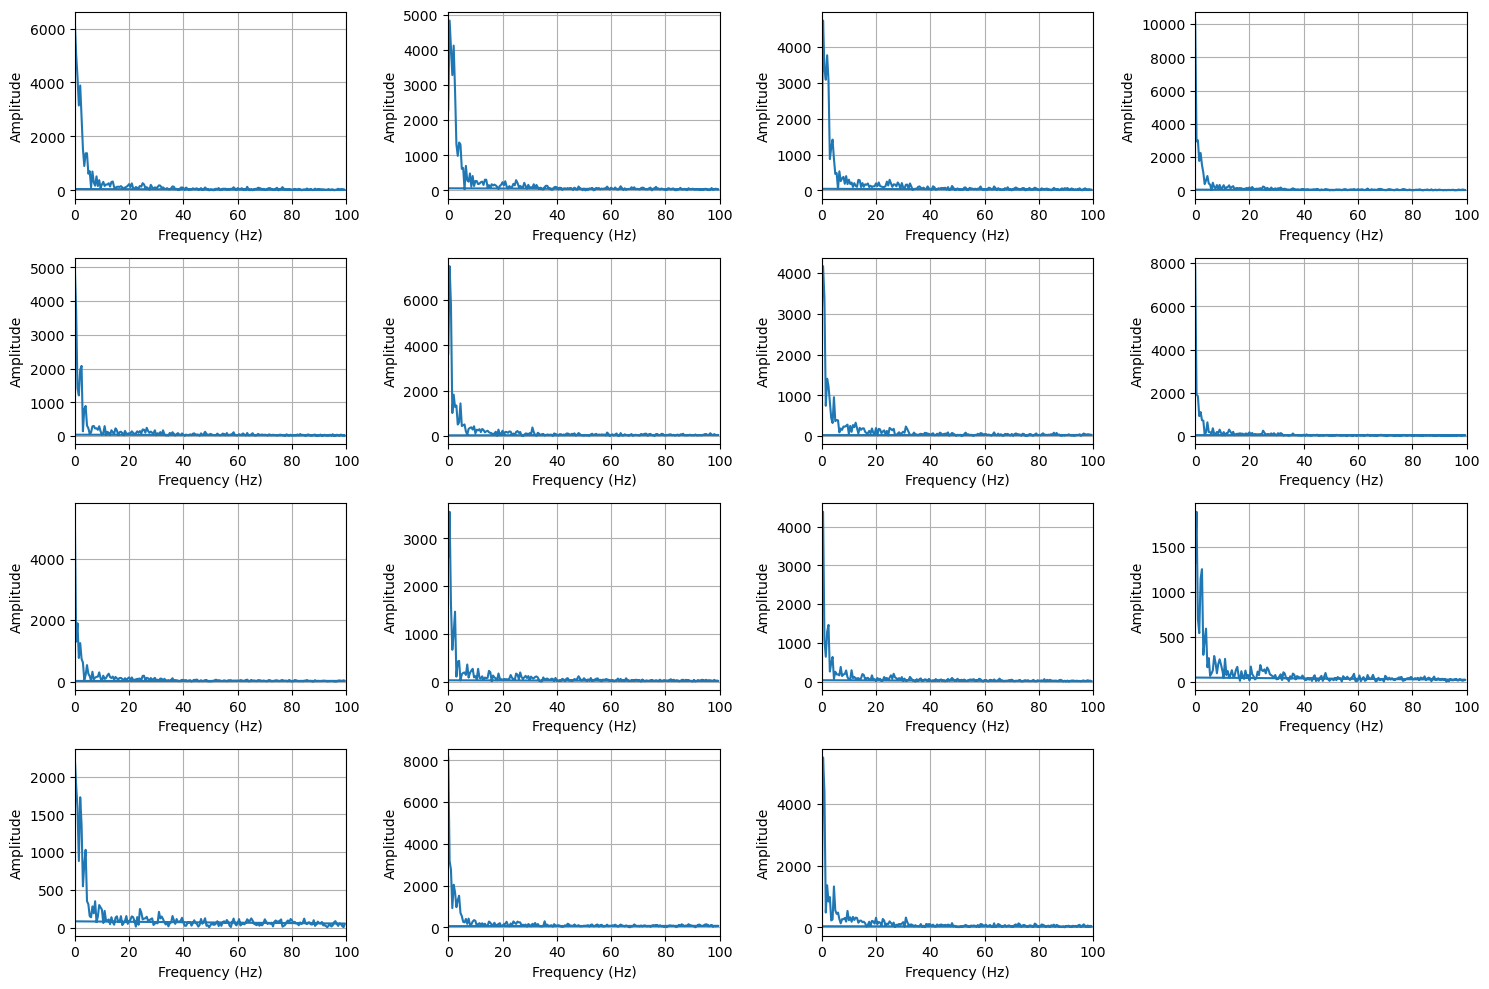

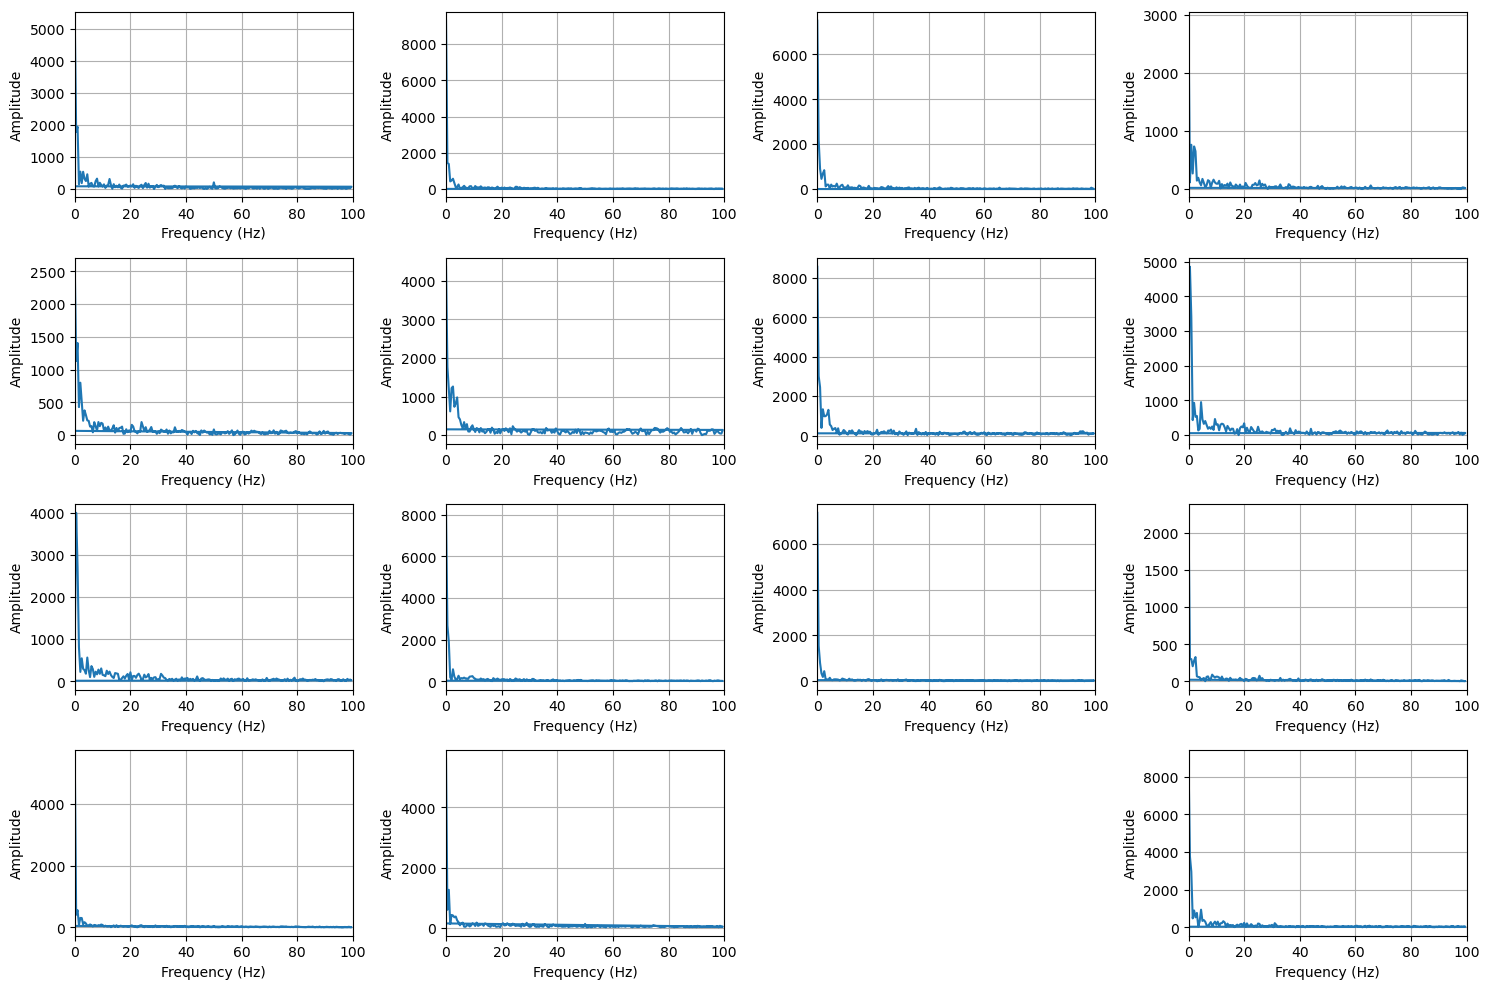

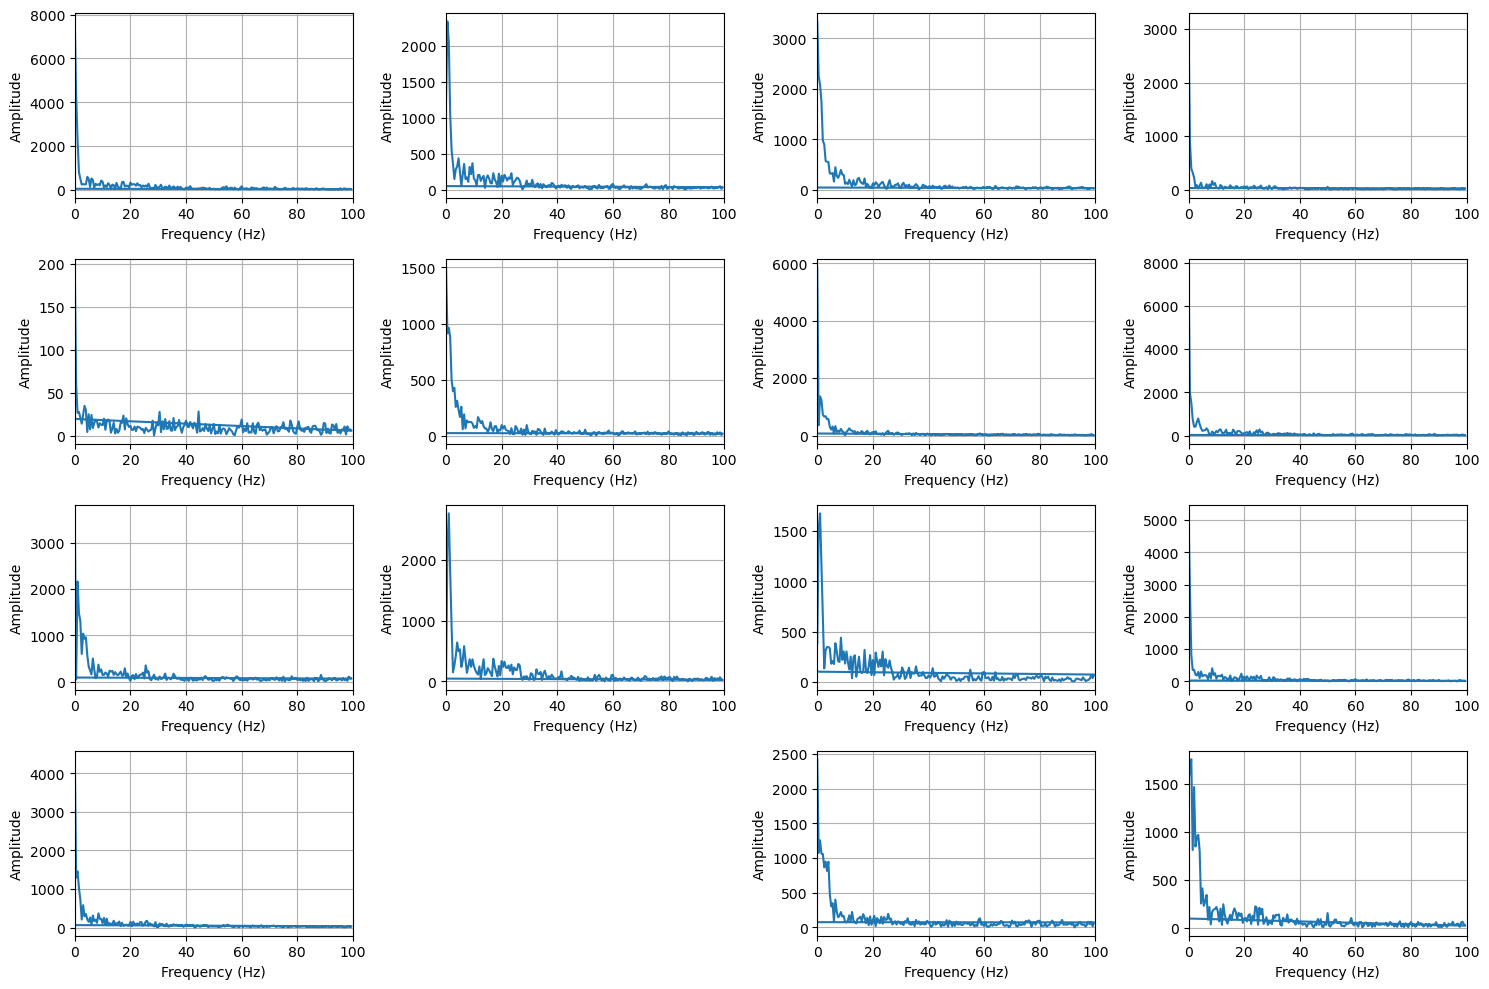

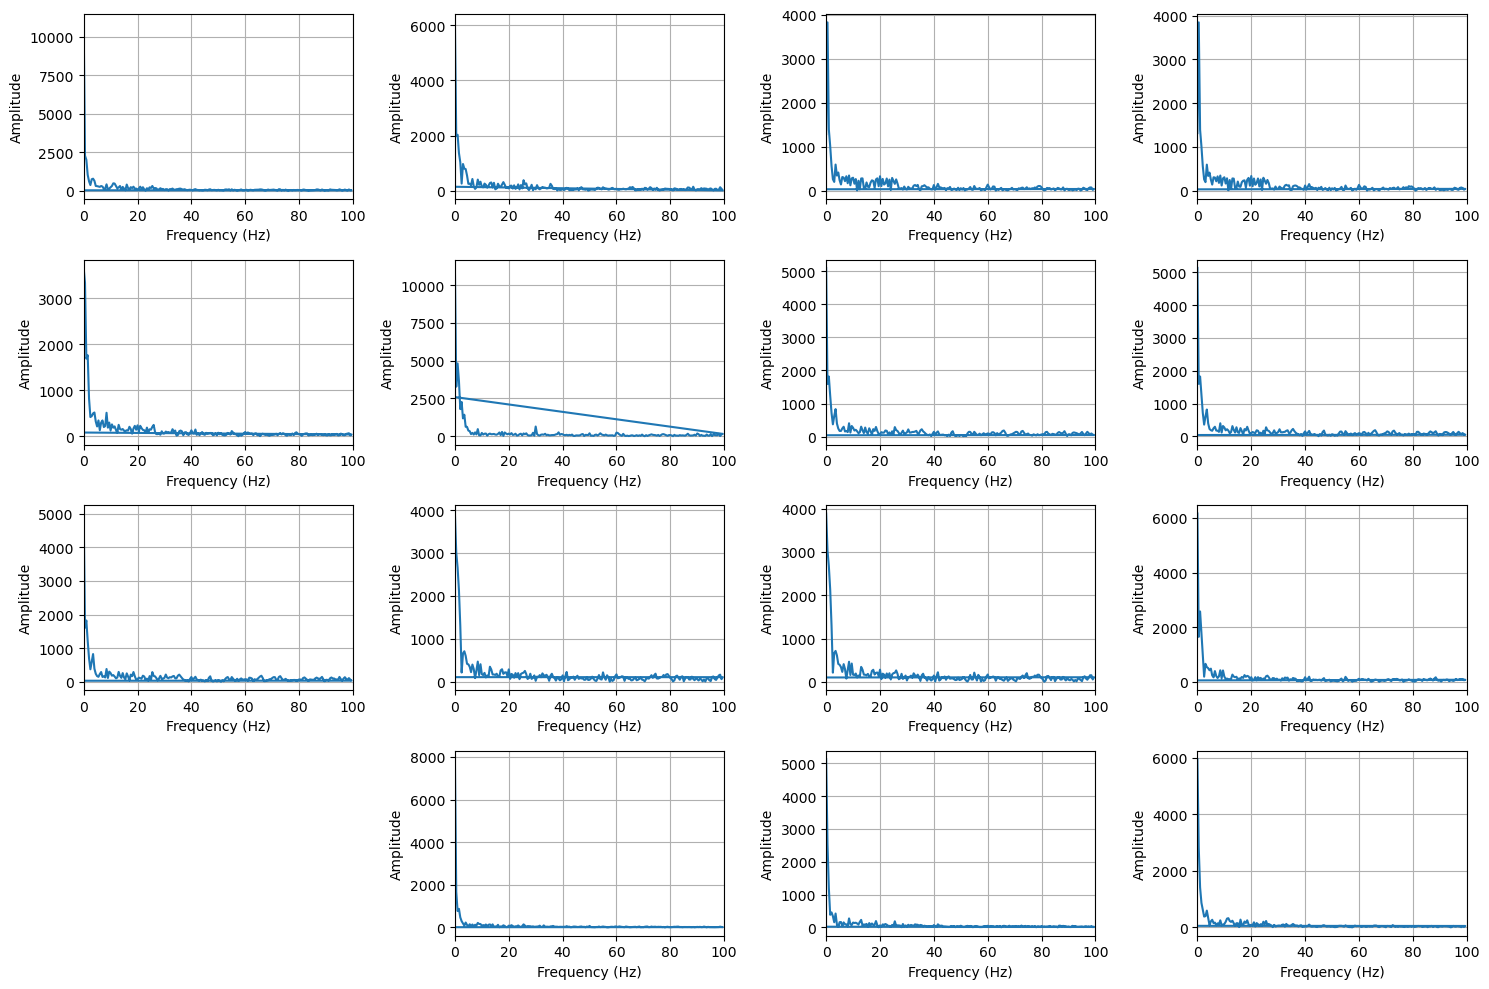

In [ ]:
for j in range(4):
    plt.figure(figsize=(15, 10))
    for i in range((data.shape[0]//4)*j, min(data.shape[0], (data.shape[0]//4)*(j+1))):
        s = data[i, 400:800]
        # s = s - np.mean(s)
        # s = s / np.std(s)
        fft_result = fft(s)

        # Calculate the frequencies corresponding to the FFT result
        frequencies = fftfreq(len(s), 1 / sr)
        # Plot the frequency spectrum
        plt.subplot(4, 4, i%16+1)
        plt.plot(frequencies, np.abs(fft_result))
        plt.xlabel('Frequency (Hz)')
        plt.xlim([0, sr/2])
        plt.ylabel('Amplitude')
        plt.grid(True)
    plt.tight_layout()
    plt.show()